# Objaverse

Objaverse is a massive dataset of annotated 3D objects.

It is hosted on 🤗[Hugging Face](https://huggingface.co/datasets/allenai/objaverse). This notebook provides a tutorial on downloading objects and annotations!

We'll get started by downloading and importing the `objaverse` package from PyPi, which will allow us to easily download subsets of the dataset:

In [1]:
%pip install --upgrade --quiet objaverse

import objaverse
objaverse.__version__

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


'0.1.7'

# Loading UIDs

Each object has a unique corresponding UID (universal identifier). Let's get all the object UIDs:

In [2]:
uids = objaverse.load_uids()
len(uids), type(uids)

(798759, list)

Here, `uids` is a list of strings. Let's look at a few of them:

In [3]:
uids[:10]

['8476c4170df24cf5bbe6967222d1a42d',
 '8ff7f1f2465347cd8b80c9b206c2781e',
 'c786b97d08b94d02a1fa3b87d2e86cf1',
 '139331da744542009f146018fd0e05f4',
 'be2c02614d774f9da672dfdc44015219',
 'efd35e7d21ac482688c294e3b6c9f74e',
 '21d5f90dbc9f4f229b0faa7b56b67f3e',
 'dcd33159a0864de388de3a08f55e604a',
 'a7ad32b5d4d84ee5a40ebbd86da4dbe4',
 '7d6a14874eed48c2b720f0d1adfe6dd9']

# Loading Annotations

We can get the object annotations for each of object using the
```python
objaverse.load_annotations(
    uids: Optional[List[str]] = None
) -> Dict[str, Dict[str, Any]]
```

function. The function optionally takes in a list of the `uids` and returns a map of each specified uid to its corresponding annotations. If `uids` is not specified, the annotations for every object is returned.

In [4]:
annotations = objaverse.load_annotations(uids[:10])
annotations

{'8476c4170df24cf5bbe6967222d1a42d': {'uri': 'https://api.sketchfab.com/v3/models/8476c4170df24cf5bbe6967222d1a42d',
  'uid': '8476c4170df24cf5bbe6967222d1a42d',
  'name': 'Iain_Dawson_Kew_Road_Formby',
  'staffpickedAt': None,
  'viewCount': 4,
  'likeCount': 0,
  'animationCount': 0,
  'viewerUrl': 'https://sketchfab.com/3d-models/8476c4170df24cf5bbe6967222d1a42d',
  'embedUrl': 'https://sketchfab.com/models/8476c4170df24cf5bbe6967222d1a42d/embed',
  'commentCount': 0,
  'isDownloadable': True,
  'publishedAt': '2021-03-18T09:36:25.430631',
  'tags': [{'name': 'stair',
    'slug': 'stair',
    'uri': 'https://api.sketchfab.com/v3/tags/stair'},
   {'name': 'staircase',
    'slug': 'staircase',
    'uri': 'https://api.sketchfab.com/v3/tags/staircase'},
   {'name': 'staircon',
    'slug': 'staircon',
    'uri': 'https://api.sketchfab.com/v3/tags/staircon'}],
  'categories': [],
  'thumbnails': {'images': [{'uid': '606cf3aaaea14bb598913e803c7b26af',
     'size': 37800,
     'width': 1920

Now, if we want to look at a particular UID's annotation, we can do:

In [5]:
annotations[uids[0]]

{'uri': 'https://api.sketchfab.com/v3/models/8476c4170df24cf5bbe6967222d1a42d',
 'uid': '8476c4170df24cf5bbe6967222d1a42d',
 'name': 'Iain_Dawson_Kew_Road_Formby',
 'staffpickedAt': None,
 'viewCount': 4,
 'likeCount': 0,
 'animationCount': 0,
 'viewerUrl': 'https://sketchfab.com/3d-models/8476c4170df24cf5bbe6967222d1a42d',
 'embedUrl': 'https://sketchfab.com/models/8476c4170df24cf5bbe6967222d1a42d/embed',
 'commentCount': 0,
 'isDownloadable': True,
 'publishedAt': '2021-03-18T09:36:25.430631',
 'tags': [{'name': 'stair',
   'slug': 'stair',
   'uri': 'https://api.sketchfab.com/v3/tags/stair'},
  {'name': 'staircase',
   'slug': 'staircase',
   'uri': 'https://api.sketchfab.com/v3/tags/staircase'},
  {'name': 'staircon',
   'slug': 'staircon',
   'uri': 'https://api.sketchfab.com/v3/tags/staircon'}],
 'categories': [],
 'thumbnails': {'images': [{'uid': '606cf3aaaea14bb598913e803c7b26af',
    'size': 37800,
    'width': 1920,
    'url': 'https://media.sketchfab.com/models/8476c4170df2

Here, we see properties like the "name", "license", "description", "tags", and other metadata.

### Filtering

We can use the annotations to filter for particular properties of objects. For example, we can filter for objects that are distributed with the CC-BY license:

In [6]:
annotations = objaverse.load_annotations()

100%|██████████| 160/160 [00:50<00:00,  3.17it/s]


> Note: Loading all annotations for the first time may take a few minutes. The annotations are being downloaded and saved locally.

And then use a list comprehension to get the CC-BY licensed objects

In [7]:
scene_uids = [uid for uid, annotation in annotations.items() for obj in annotation["tags"] if (obj["name"] == "scene" or obj["name"] == "environment") ]
len(scene_uids)
# annotations[scene_uids[0]]["tags"]

3013

In [8]:
annotations = None

In [9]:
# import os
# os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
# !PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
# print(os.environ['PYOPENGL_PLATFORM'])

# Downloading Objects

We're going to use multiprocessing to download the objects. First, let's check our CPU count to get the number of processes we'll use:

In [10]:
import multiprocessing
processes = multiprocessing.cpu_count()
processes

12

For ease of demonstration, let's randomly sample 100 objects that we'll want to download:

And now, let's download them with `objaverse.load_objects` with all of our processes. The function

```python
objaverse.load_objects(
    uids: List[str],
    download_processes: int = 1
) -> Dict[str, str]
```

takes in a list of object UIDs and optionally the number of download processes, and returns a map from each object UID to its `.glb` file location on disk:

In [11]:
objects = objaverse.load_objects(
    uids=[scene_uids[0]],
    download_processes=processes
)
objects

{'5fcc302b89414348811eaa1ad4dc435f': 'C:\\Users\\texas\\.objaverse\\hf-objaverse-v1\\glbs/000-000/5fcc302b89414348811eaa1ad4dc435f.glb'}

Once objects are downloaded locally for the first time, subsequent calls to `load_objects` are cached, and thus much faster:

In [12]:
objects = objaverse.load_objects(uids=[scene_uids[0]])
objects

{'5fcc302b89414348811eaa1ad4dc435f': 'C:\\Users\\texas\\.objaverse\\hf-objaverse-v1\\glbs/000-000/5fcc302b89414348811eaa1ad4dc435f.glb'}

Let's load up one of the `.glb` files to visualize it:

#Pyrender

In [13]:
# import os
# os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
# !PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
# print(os.environ['PYOPENGL_PLATFORM'])

In [14]:
 # clone pyrender repo
%cd ./content/
import os
from os.path import exists, join, basename

project_name = "pyrender"
if not exists(project_name):
  # clone and install
  !git clone -q https://github.com/mmatl/pyrender.git
  #requirements file gives the wrong pyglet
  #ERROR: pyrender 0.1.23 has requirement pyglet==1.4.0b1, but you'll have pyglet 1.4.0a1 which is incompatible.
  #!cd $project_name && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)

c:\Users\texas\Desktop\Personal\SceneFusion\content


C:\Users\texas\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
%cd ./content/

[WinError 2] The system cannot find the file specified: './content/'
c:\Users\texas\Desktop\Personal\SceneFusion\content


C:\Users\texas\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [16]:
%pip install PyOpenGL

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# import OpenGL.GL as gl
# print(gl.glGetString(gl.GL_VERSION))
# print(gl.glGetString(gl.GL_VENDOR))


In [18]:
# Install pyrender
%pip install pyrender

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# !yes | pip uninstall pyglet
# !pip install pyglet==1.5.11

#Visualization

In [20]:
%pip install trimesh
%pip install matplotlib
# !pip install pyopengl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import trimesh
scene_glb = trimesh.load(list(objects.values())[0])
scene_glb.show()

# trimesh save image
# data = scene_glb.save_image(resolution=(1080,1080))

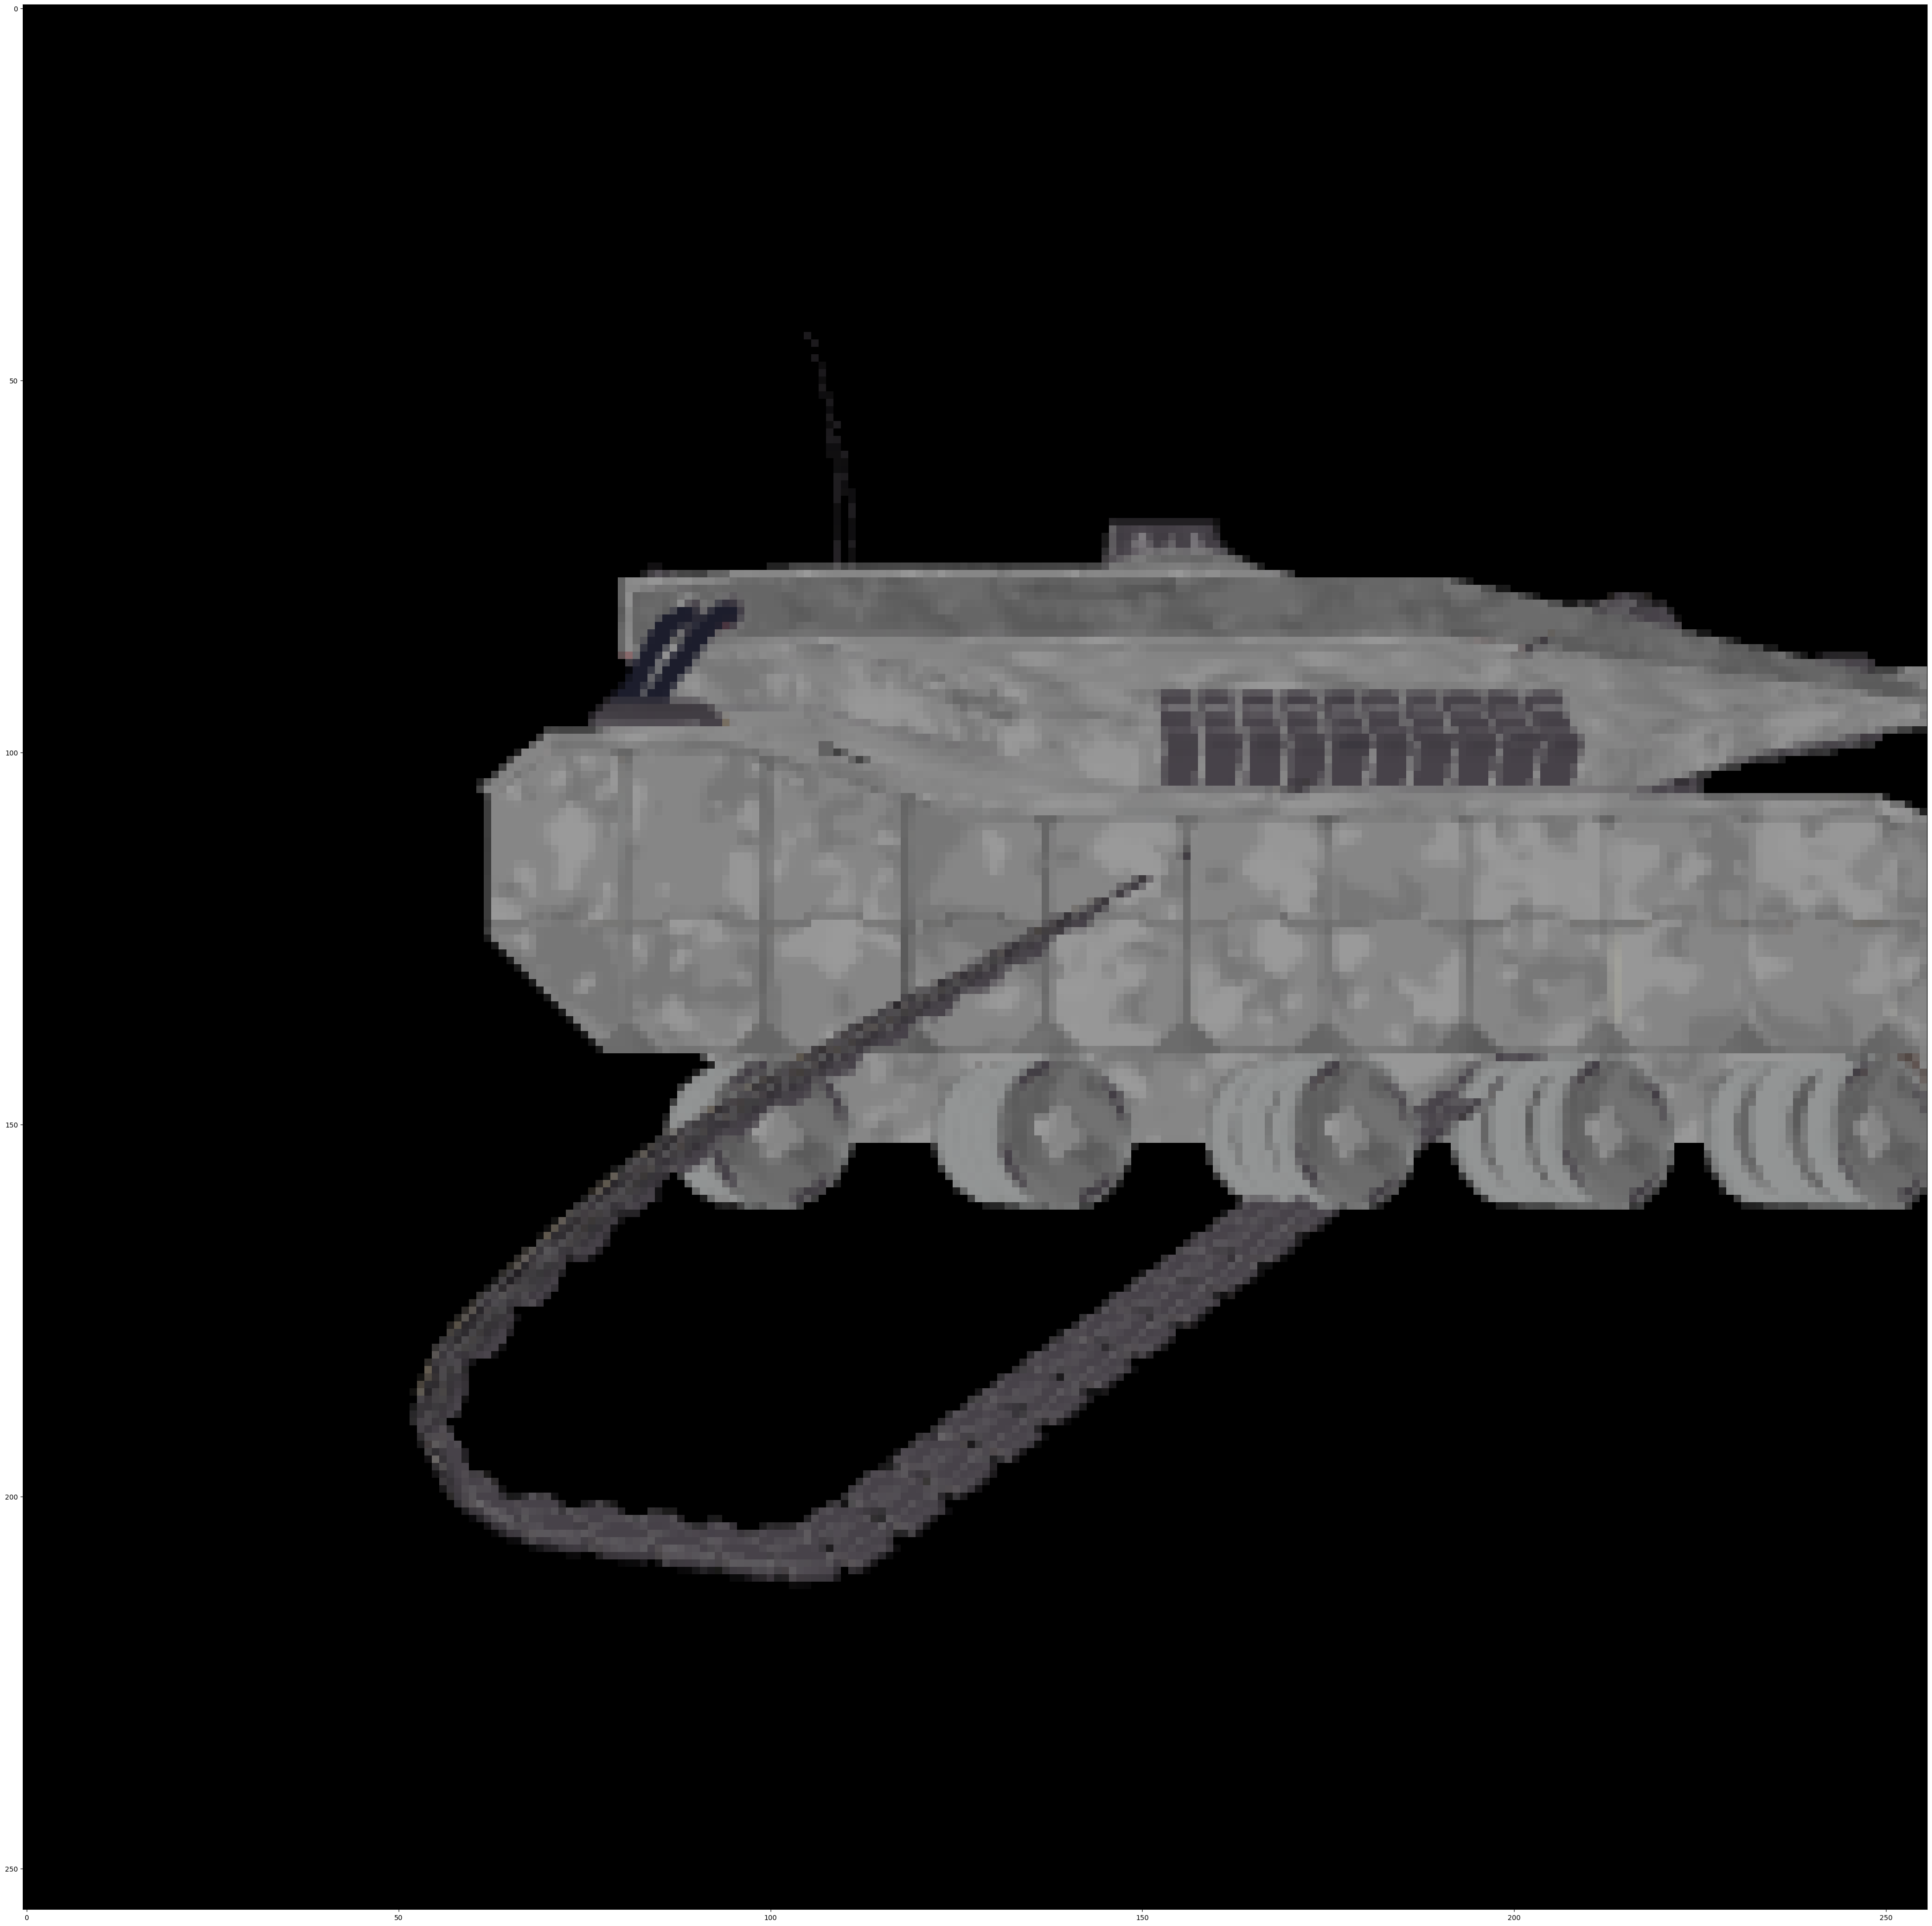

In [29]:
import os
import numpy as np
import trimesh

from pyrender import PerspectiveCamera,\
                     DirectionalLight, SpotLight, PointLight,\
                     MetallicRoughnessMaterial,\
                     Primitive, Mesh, Node, Scene,\
                     OffscreenRenderer, Viewer
                     
scene = Scene.from_trimesh_scene(scene_glb, bg_color=[0.0, 0.0, 0.0, 0.0], ambient_light=[1.0, 1.0, 1.0, 1.0])

# add constant flat ambient light
scene.ambient_light = np.array([1, 1, 1, 1])

# create a light that points straight down
light = DirectionalLight(color=np.ones(3), intensity=1.0)
scene.add(light, pose=np.eye(4))

import pyrender

cam = PerspectiveCamera(yfov=(np.pi / 3.0))
# move the camera -Z away from the origin by 100 units
camNode = Node(camera=cam, matrix=np.eye(4))
# get center of scene
center = scene.centroid
# move the camera to the calculated position
camNode.translation = np.array([center[0], center[1], center[2] + 10.0])
scene.add_node(camNode)

# flat light
v = Viewer(scene, viewport_size=(256, 256))

r = OffscreenRenderer(viewport_width=256, viewport_height=256)
color, depth = r.render(scene, flags=pyrender.RenderFlags.FLAT)

import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.imshow(color)
plt.show()


> **NOTE: I highly recommend using Blender for rendering. It will texture the meshes much better than trimesh. I just wanted to show a quick visualization.**

In [24]:
# png = mesh.save_image(resolution=[1920, 1080], visible=True)

# LVIS Annotations

Finally, we'll load in the LVIS annotations, which returns a dictionary that maps from the LVIS category (key) to a list of object UIDs within that category (value):

In [25]:
# lvis_annotations = objaverse.load_lvis_annotations()
# lvis_annotations

Note, too, that we have currently removed and are reviewing a few thousand of the objects that were detected as scans of humans to allow other research organizations to use the dataset.

For more information, please visit our [website](objaverse.allenai.org) or open a discussion on our 🤗[Hugging Face repo](https://huggingface.co/datasets/allenai/objaverse/discussions).